In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Hypothesis function

Outputs Y, Given X, by parameter &theta;

1. In Vector Form:

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/Two%20Variables/Sources/hypothesis.jpg?raw=1)

-   m -> number of elements in the dataset
-   n -> no. of features of a data (in this example 2)
-   X -> m x (n+1) matrix
    -    +1 as we have concatenated 1 so as to keep &theta;<sub>0</sub> as constant
-   &theta; -> (n+1) x 1 matrix
-   Outputs mx1 matrix

Vector Form is implemented here for faster Operation




In [ ]:
def hypothesis(x, theta):
    '''calculates the hypothesis function'''
    return np.matmul(x, theta)

## Cost Function

This essentially calculates the distance between what we need the line to be, and what it actually is:

1. Vector Form for faster implementation
    -   m -> number of elements in the dataset
    -   h(&theta;, X) and Y -> mx1 matrix
    -   Outputs 1x1 matrix

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/cost_function_matrix.jpg?raw=1)

In [ ]:
def compute_cost(x, y, theta):
    '''outputs the cost function'''
    m = len(y)
    error = hypothesis(x, theta) - y
    error_square_summed = np.matmul(np.transpose(error), error)
    return 1/(2*m)*error_square_summed

## Gradient Descent

Gradient Descent is an iterative way through which we can minimize the cost function J(&theta;,x), which essentially depends on the values of &theta;<sub>0</sub> and &theta;<sub>1</sub>

This algorithm iteratively minimizes J(&theta; ,x) to reach it's minimum possible value

- Vector Implementation to speed up Algorithm: 
    -   m -> dataset size
    -   n -> no. of features of a data (in this example 2)
    -   X -> m x (n+1) matrix
    -   h(&theta;, X) and Y -> mx1 matrix
    -   &theta; -> (n+1) x 1 matrix

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/gradient_descent_matrix.jpg?raw=1)




In [ ]:
def gradient_descent(x, y, theta, alpha, num_iter):
    '''Performs Gradient Descent and outputs minimized theta and history of cost_functions'''
    m = len(y)
    J_history = np.zeros((num_iter, 1))

    for iter in range(num_iter):
        h = hypothesis(x, theta)
        error = h-y
        partial_derivative = 1/m * np.matmul(np.transpose(x), error)
        theta = theta - alpha*partial_derivative

        J_history[iter] = compute_cost(x, y, theta)

    return theta, J_history

# Normalization

As Features of X might be skewed, it is safer to normalize the features of X to same range, this reduces error, and also make learning faster

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/Two%20Variables/Sources/Normalization.jpg?raw=1)

-  X -> m x n matrix <mark>(note there is no +1)</mark>
-  &mu; -> 1 x n matrix, mean of the features of X 
-  &sigma; -> 1 x n matrix, standard deviation of the features of X

This essentially converts all values of a feature in the range (-1,1)



In [ ]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm,mu,sigma

#Predict 
 
 uses hypothesis() to predict value of new input

In [ ]:
def predict(value, minimized_theta,mu,sigma):
    value = np.array(value)
    mu = np.array(mu)
    sigma = np.array(sigma)


    mu = mu.reshape(1,mu.shape[0])
    sigma = sigma.reshape(1,sigma.shape[0])

    normalized_value =  (value -mu)/sigma
    one = np.array([[1]])
    x_array = np.concatenate((one,normalized_value),axis=1)
    return hypothesis(x_array,minimized_theta)

# Processing
Loading Data from `ex1data2.txt`

The `ex1data2.txt` contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [ ]:
data_path = "./ex1data2.txt"
data = np.loadtxt(data_path, delimiter=',')

Extracting Poulation and Profits from data

In [ ]:
# first value is independent variable x, second is dependant y
X= data[:, 0:2]
Y = data[:, 2]

Printing Some Data Points

In [ ]:
print("First 10 examples from the dataset")

for iter in range(10):
    print(f"X = {X[iter]}, Y = {Y[iter]}")

First 10 examples from the dataset
X = [2104.    3.], Y = 399900.0
X = [1600.    3.], Y = 329900.0
X = [2400.    3.], Y = 369000.0
X = [1416.    2.], Y = 232000.0
X = [3000.    4.], Y = 539900.0
X = [1985.    4.], Y = 299900.0
X = [1534.    3.], Y = 314900.0
X = [1427.    3.], Y = 198999.0
X = [1380.    3.], Y = 212000.0
X = [1494.    3.], Y = 242500.0


By looking in the value of X, we see that value are not in same range, so we normalize the value of X so that the learing becomes more accurate and fast

while predicting, model will give normalized output, we need to de-normalize it

In [ ]:
X,mu,sigma = featureNormalize(X)

adding ones to X and changing y from vector to 2D array

In [ ]:
#adding ones to X
dataset_size = X.shape[0]
ones = np.ones(dataset_size).reshape(dataset_size,1)
X = np.concatenate((ones,X),axis=1)

Y = Y.reshape(dataset_size,1)

print(X.shape)

(47, 3)


Running Gradient Descent

In [ ]:
print("Running Gradient Descent ...\n")
alpha = 1
num_iter = 10
theta = np.zeros((X.shape[1],1))
minimized_theta, J_history = gradient_descent(X, Y, theta, alpha, num_iter)

print("Theta found by gradient descent:")
print(minimized_theta)


Running Gradient Descent ...

Theta found by gradient descent:
[[340412.65957447]
 [109116.02965272]
 [ -6558.41402464]]


Plotting Value of J during Gradient Descent (This should Decrease with Epochs)

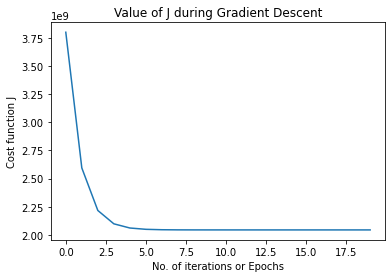

In [ ]:
plt.figure("Value of J during Gradient Descent")
plt.title('Value of J during Gradient Descent')
x_axis = range(len(J_history))
plt.xlabel('No. of iterations or Epochs')
plt.ylabel("Cost function J")
plt.plot(x_axis,J_history)

Estimate the price of a 1650 sq-ft, 3 br house



In [ ]:
predict_input = np.array([1650,3])
predict_input = predict_input.reshape(1,predict_input.shape[0])

print(f"Predicted Price of a 1650 sq-ft, 3 bedroom house: {predict(predict_input,minimized_theta,mu,sigma)}")

Predicted Price of a 1650 sq-ft, 3 bedroom house: [[293081.89924482]]
